In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [132]:
train=pd.read_csv('D:/train.csv',index_col=0)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [133]:
test=pd.read_csv('D:/test.csv',index_col=0)
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [134]:
train.shape

(891, 11)

In [135]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [136]:
#feature selection
train=train.drop('Cabin',1)
test=test.drop('Cabin',1)

In [137]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [138]:
print(train['Embarked'].mode())
print(test['Embarked'].mode())

0    S
dtype: object
0    S
dtype: object


In [149]:
train['Age'] = train['Age'].fillna((train['Age'].mean()))
train['Embarked'] = train['Embarked'].fillna('S')
test['Age'] = test['Age'].fillna((train['Age'].mean()))
test['Fare'] = test['Fare'].fillna((train['Fare'].mean()))
test['Embarked'] = test['Embarked'].fillna('S')
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [151]:
test1.isnull().sum()

Pclass        0
Name          0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

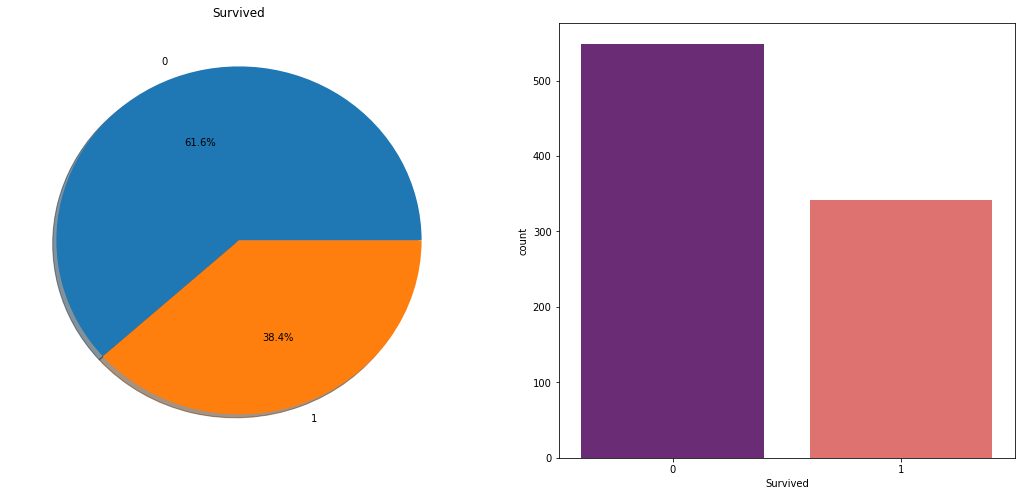

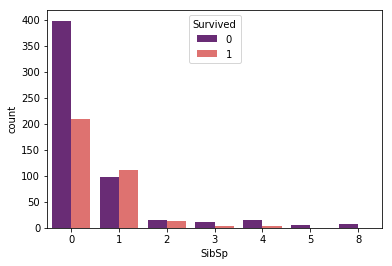

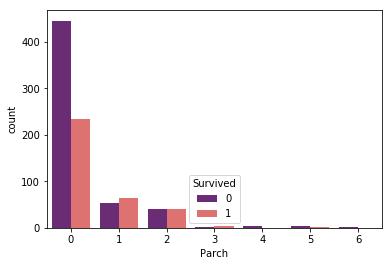

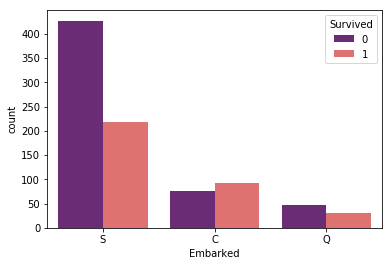

In [336]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['Survived'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived',data=train,palette='magma')
plt.show()


sns.countplot(x='SibSp',hue='Survived',data=train,palette='magma')
plt.show()

sns.countplot(x='Parch',hue='Survived',data=train,palette='magma')
plt.show()

sns.countplot(x='Embarked',hue='Survived',data=train,palette='magma')
plt.show()




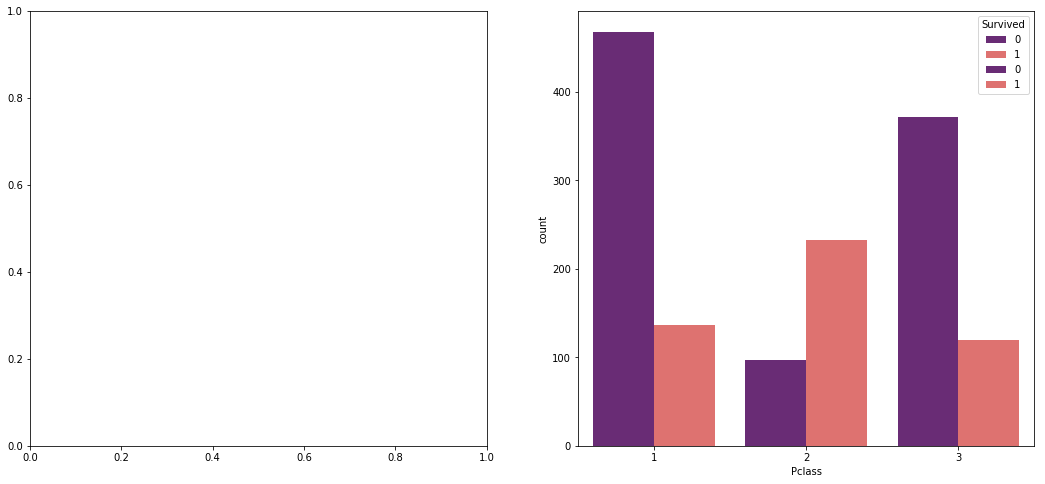

In [342]:
f,ax=plt.subplots(1,2,figsize=(18,8))
ax[0]=sns.countplot(x='Sex',hue='Survived',data=train,palette='magma')
plt.show
ax[1]=sns.countplot(x='Pclass',hue='Survived',data=train,palette='magma')
plt.show()





In [154]:
train1=pd.get_dummies(train,columns=["Sex","Embarked"],drop_first=True)
test1=pd.get_dummies(test,columns=["Sex","Embarked"],drop_first=True)

test1.head()

,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,1,1,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,0,0,1
894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,1,1,0
895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,1,0,1
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,0,0,1


# Regresi Logistik

In [249]:
from sklearn.cross_validation import train_test_split
X = train1.drop(['Survived','Name','Ticket'], 1)
Y = train1['Survived']
x = test1.drop(['Name','Ticket'], 1)
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=123)

In [250]:
logreg = LogisticRegression(random_state = 123)
logreg.fit(train_x, train_y)
y_predict = logreg.predict(test_x)

In [251]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score

cm1=pd.DataFrame(
    confusion_matrix(test_y, y_predict),
    columns=['Target 0','Target 1'],
    index=['Target 0', 'Target 1']
)
cm=confusion_matrix(test_y, y_predict)
total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
sensitivity=cm[1,1]/(cm[1,0]+cm[1,1])
specificity=cm[0,0]/(cm[0,0]+cm[0,1])

cm1

,Target 0,Target 1
Target 0,101,13
Target 1,19,46


In [252]:
#Evaluation
print('Accuracy : ', accuracy)
print('Sensitivity : ', sensitivity)
print('Specificity : ', specificity)

Accuracy :  0.8212290502793296
Sensitivity :  0.7076923076923077
Specificity :  0.8859649122807017


# Decision Tree

In [253]:
from sklearn import tree

model1 = tree.DecisionTreeClassifier(random_state=123)
model1

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

In [254]:
model1.fit(train_x, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

In [255]:
y_predict = model1.predict(test_x)

from sklearn.metrics import accuracy_score

accuracy_score(test_y, y_predict)

0.8044692737430168

In [256]:
cm1=pd.DataFrame(
    confusion_matrix(test_y, y_predict),
    columns=['Target 0','Target 1'],
    index=['Target 0', 'Target 1']
)
cm=confusion_matrix(test_y, y_predict)
total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
sensitivity=cm[1,1]/(cm[1,0]+cm[1,1])
specificity=cm[0,0]/(cm[0,0]+cm[0,1])

cm1

,Target 0,Target 1
Target 0,96,18
Target 1,17,48


In [257]:
print('Accuracy : ', accuracy)
print('Sensitivity : ', sensitivity)
print('Specificity : ', specificity)

Accuracy :  0.8044692737430168
Sensitivity :  0.7384615384615385
Specificity :  0.8421052631578947


# RANDOM FOREST

In [286]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

ranfor = RandomForestClassifier(n_estimators=15,min_samples_leaf=10, min_samples_split=20, max_depth=7, random_state=123)
ranfor.fit(train_x,train_y)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=20,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [287]:
y_predict = ranfor.predict(test_x)

from sklearn.metrics import accuracy_score

accuracy_score(test_y, y_predict)

0.8603351955307262

In [288]:
cm1=pd.DataFrame(
    confusion_matrix(test_y, y_predict),
    columns=['Target 0','Target 1'],
    index=['Target 0', 'Target 1']
)
cm=confusion_matrix(test_y, y_predict)
total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
sensitivity=cm[1,1]/(cm[1,0]+cm[1,1])
specificity=cm[0,0]/(cm[0,0]+cm[0,1])

cm1

,Target 0,Target 1
Target 0,106,8
Target 1,17,48


In [289]:
print('Accuracy : ', accuracy)
print('Sensitivity : ', sensitivity)
print('Specificity : ', specificity)

Accuracy :  0.8603351955307262
Sensitivity :  0.7384615384615385
Specificity :  0.9298245614035088


In [291]:
test1.head()
dtpred1=ranfor.predict(x)
dtpred1=pd.DataFrame(dtpred1)
dtpred1.columns=['Survived']
dtpred1.head()

,Survived
0,0
1,0
2,0
3,0
4,1


In [293]:
reglog_test = ranfor.predict(x)
df_pred = pd.DataFrame({'Survived': reglog_test})
df_submit = pd.concat([x.reset_index()['PassengerId'], df_pred], axis=1)
df_submit = df_submit.set_index('PassengerId')
df_submit.to_csv('result.csv',sep=',',index=True)